# ECE 59500 Machine Learning: Assignment 3

# Exercise 1: Maximum Likelihood Estimation of Covariance Matrix

## (a)

### (i)

$$
x^TAx=\sum_{i,j=1}^{d}[A]_{i,j}x_ix_j
$$

$$
[Axx^T]_{j,j}=\sum_{i=1}^{d}[A]_{j,i}x_jx_i→tr[Axx^T]=\sum_{i,j=1}^{d}[A]_{i,j}x_ix_j=x^TAx
$$

### (ii)

$
p[x_1,...,x_N|\Sigma]\\
=\prod_{i=1}^{N}\frac{1}{(2\pi)^{\frac{d}{2}}|\Sigma|^\frac{1}{2}}\text{exp}\{-\frac{1}{2}(x_i-\mu)^T\Sigma^{-1}(x_i-\mu)\}\\
=\frac{1}{(2\pi)^{\frac{Nd}{2}}|\Sigma|^\frac{N}{2}}\text{exp}\{-\frac{1}{2}∑_{i=1}^{N}(x_i-\mu)^T\Sigma^{-1}(x_i-\mu)\}\\
=\frac{1}{(2\pi)^{\frac{Nd}{2}}|\Sigma|^\frac{N}{2}}\text{exp}\{-\frac{1}{2}∑_{i=1}^{N}tr[\Sigma^{-1}(x_i-\mu)(x_i-\mu)^T]\}\\
=\frac{1}{(2\pi)^{\frac{Nd}{2}}|\Sigma|^\frac{N}{2}}\text{exp}\{-\frac{1}{2}tr[\Sigma^{-1}∑_{i=1}^{N}(x_i-\mu)(x_i-\mu)^T]\}
$

### (iii)

In definition, $\hat{\Sigma}_{MLE}^{-1}=\Sigma^{-1}$. 

$$
|\Sigma^{-1}|=|\hat{\Sigma}_{MLE}^{-1}||A|=|\hat{\Sigma}_{MLE}|^{-1}\prod_{i=1}^d\lambda_i
$$

Combining expression in (ii) with what we have

$
tr[\Sigma^{-1}\sum_{i=1}^{N}(x_i-\mu)(x_i-\mu)^T]\\
=tr[N\Sigma^{-1}\hat{\Sigma}_{MLE}]\\
=N\sum_{i=1}^{d}\lambda_i
$

### (iv)

Take derivative with respect to $\lambda_k$ and set to zero. Denote $C=\frac{1}{(2\pi)^{\frac{Nd}{2}}|\hat{\Sigma}_{MLE}|^\frac{N}{2}}$

$
0=\frac{\partial}{\partial\lambda_k}\{C(∏_{i=1}^{d}\lambda_i)^(\frac{N}{2})\text{exp}\{-\frac{N}{2}\sum_{i=1}^{d}\lambda_i\}\}\\
=C\frac{N}{2}(∏_{i=1}^{d}\lambda_i)^\frac{N}{2}\frac{1}{\lambda_k}\text{exp}\{-\frac{N}{2}\sum_{i=1}^{d}\lambda_i\}-C\frac{N}{2}(∏_{i=1}^{d}\lambda_i)^\frac{N}{2}\text{exp}\{-\frac{N}{2}\sum_{i=1}^{d}\lambda_i\}\\
=C\frac{N}{2}(∏_{i=1}^{d}\lambda_i)^\frac{N}{2}\text{exp}\{-\frac{N}{2}\sum_{i=1}^{d}\lambda_i\}(\frac{1}{\lambda_k}-1)
$

$$
\frac{1}{\lambda_k}=1\leftrightarrow\lambda_k=1
$$

# Exercise 2: Cat Classification

## (a) Train the classifier with text file

### (i)

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data_dir = "/content/drive/MyDrive/ECE595_assignments/Assignment-3/data/"
cat_train_data_dir = os.path.join(data_dir, "train_cat.txt")
grass_train_data_dir = os.path.join(data_dir, "train_grass.txt")

# Load cat and grass training data
cat_train_data = np.matrix(np.loadtxt(cat_train_data_dir, delimiter=','))
grass_train_data = np.matrix(np.loadtxt(grass_train_data_dir, delimiter=','))

### (ii)

In [23]:
def calc_mean_cov(train_data):
    # Calculate means and covariance
    mean = train_data.mean(axis=1)
    cov = np.cov(train_data)
    return mean, cov

# Train Naive Bayes classifier
mean_cat, cov_cat = calc_mean_cov(cat_train_data)
mean_grass, cov_grass = calc_mean_cov(grass_train_data)
K_cat, K_grass = cat_train_data.shape[1], grass_train_data.shape[1]

## (b) Test the classifier on image

### (i)

In [41]:
# Load the images
image_dir = os.path.join(data_dir, "cat_grass.jpg")
test_img = plt.imread(image_dir) / 255
label_dir = os.path.join(data_dir, "truth.png")
label_img = plt.imread(label_dir) / 255

### (ii)

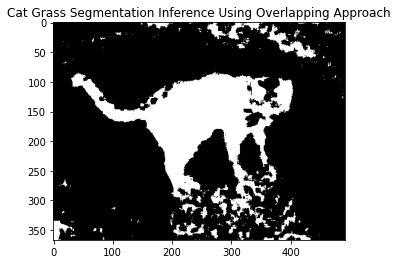

In [61]:
def testing(Y, mean_cat, cov_cat, K_cat, mean_grass, cov_grass, K_grass, shift_size=1):
    
    d = mean_cat.shape[0]
    h, w = Y.shape
    output = np.zeros((h - 8, w - 8))
    prior_cat = K_cat / (K_cat + K_grass)
    prior_grass = K_grass / (K_cat + K_grass)
    cov_cat_inv = np.linalg.pinv(cov_cat)
    cov_grass_inv = np.linalg.pinv(cov_grass)
    C_cat = 1 / (2 * np.pi) ** (d / 2) / np.sqrt(np.linalg.det(cov_cat)) * prior_cat
    C_grass = 1 / (2 * np.pi) ** (d / 2) / np.sqrt(np.linalg.det(cov_grass)) * prior_grass

    for i in np.arange(0, h - 8, shift_size):
        for j in np.arange(0, w - 8, shift_size):
            z = np.reshape(Y[i:i+8, j:j+8], (64, 1), 'F')
            f_cat = C_cat * np.exp(-0.5 * ((z - mean_cat).T @ cov_cat_inv @ (z - mean_cat)))
            f_grass = C_grass * np.exp(-0.5 * ((z - mean_grass).T @ cov_grass_inv @ (z - mean_grass)))
            if f_cat > f_grass:
                 output[i:i + shift_size, j:j + shift_size] = 1
            else:
                 output[i:i + shift_size, j:j + shift_size] = 0
    output = np.asfarray(output)
    return output

# Perform inference using overlapping approach
test_image_output1 = testing(test_img, mean_cat, cov_cat, K_cat, mean_grass, cov_grass, K_grass)
plt.title("Cat Grass Segmentation Inference Using Overlapping Approach")
plt.imshow(test_image_output1, cmap='gray')

### (iii)

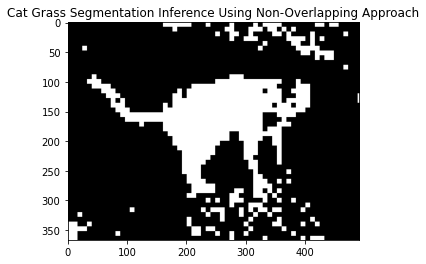

In [62]:
# Perform inference using non-overlapping approach
test_image_output2 = testing(test_img, mean_cat, cov_cat, K_cat, mean_grass, cov_grass, K_grass, shift_size=8)
plt.title("Cat Grass Segmentation Inference Using Non-Overlapping Approach")
plt.imshow(test_image_output2, cmap='gray')

### (iv)

In [74]:
# Find the mean absolute error
label_img = label_img[0:375-8, 0:500-8]

mae1 = (np.abs(np.subtract(label_img, test_image_output1))).mean()
print("The mean absolute error between truth and output image 1: " + str(mae1))

mae2 = (np.abs(np.subtract(label_img, test_image_output2))).mean()
print("The mean absolute error between truth and output image 2: " + str(mae2))


The mean absolute error between truth and output image 1: 0.20541927035131918
The mean absolute error between truth and output image 2: 0.21149889836614405


### (v)

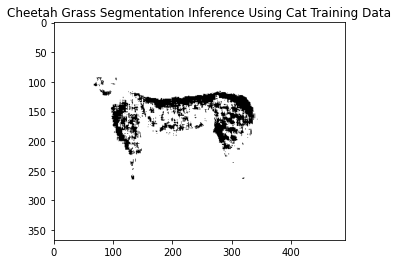

In [92]:
# Load the images
image_dir = os.path.join(data_dir, "cheetah_grass.jpg")
cheetah_img = plt.imread(image_dir) / 255

test_image_output3 = testing(cheetah_img, mean_cat, cov_cat, K_cat, mean_grass, cov_grass, K_grass)
plt.title("Cheetah Grass Segmentation Inference Using Cat Training Data")
plt.imshow(test_image_output3, cmap='gray')

I concluded two solution for the problem. First, the float value that determines the mask are not on same level with the cheetah image, causing the color to be different but catching the shape. Second, the position of the cheetah is different. The classifier are not good enough to capture transformation of the image.

# Exercise 3: Connection to Linear Least-Squares

## (a)

$$
\beta=\hat{\Sigma}^{-1}(\hat{\mu}_2-\hat{\mu}_1)\\
\beta_0=-\frac{1}{2}\hat{\mu}_2^T\hat{\Sigma}^-1\hat{\mu}_2+\frac{1}{2}\hat{\mu}_1^T\hat{\Sigma}^-1\hat{\mu}_1+log(\frac{N_2}{N})-log(\frac{N_1}{N})
$$

## (b)

### (i)

Taking product of expression $A$ we have

$$
A^TA=\begin{bmatrix} \sum_{i=1}^{N_1}x_i^{(1)}x_i^{(1)T} + \sum_{i=1}^{N_2}x_i^{(2)}x_i^{(2)T} & \sum_{i=1}^{N_1}x_i^{(1)} + \sum_{i=1}^{N_2}x_i^{(2)}\\
\sum_{i=1}^{N_1}x_i^{(1)T} + \sum_{i=1}^{N_2}x_i^{(2)T} & N\end{bmatrix}
$$

$$
\hat{\Sigma}=\frac{1}{N-2}[(\sum_{i=1}^{N_1}x_i^{(1)}x_i^{(1)T})-N_1\hat{\mu}_1\hat{\mu}_1^T+(\sum_{j=1}^{N_2}x_j^{(2)}x_j^{(2)T})-N_2\hat{\mu}_2\hat{\mu}_2^T]
$$

Follows that

$$
\sum_{i=1}^{N_1}x_i^{(1)}x_i^{(1)T}+\sum_{j=1}^{N_2}x_j^{(2)}x_j^{(2)T}=(N-2)\hat{\Sigma}+N_1\hat{\mu}_1\hat{\mu}_1^T+N_2\hat{\mu}_2\hat{\mu}_2^T
$$

### (ii)

For $b$, $b_i=e_1$ for $i=1$ to $N_1$, $b_i=e_2$ for $i=N_1+1$ to $N$.

### (iii)

Substituting expressions of $A^TA$ and $A^Tb$ into

$$
A^TA\begin{bmatrix}w\\w_o\end{bmatrix}=A^Tb
$$

## (c)

$$
w=\frac{1}{N-2}\hat{\Sigma}^{-1}(\hat{\mu}_2-\hat{\mu}_1)
$$

## (d)

$$
w_0=\frac{a}{2}(\hat{\mu}_1^T\hat{\Sigma}^{-1}\hat{\mu}_1-\hat{\mu}_2^T\hat{\Sigma}^{-1}\hat{\mu}_2)
$$

Inverse is symmetric therefore

$$
\hat{\mu}_1^T\hat{\Sigma}^{-1}\hat{\mu}_2-\hat{\mu}_2^T\hat{\Sigma}^{-1}\hat{\mu}_1 = 0
$$

Compare to expression of $\beta _0$

$$
\beta _0=\frac{1}{2}(\hat{\mu}_1^T\hat{\Sigma}^{-1}\hat{\mu}_1-\hat{\mu}_2^T\hat{\Sigma}^{-1}\hat{\mu}_2)
$$